In [43]:

pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


## 1. Data Collection and Preprocessing

In [6]:

import pandas as pd
import yfinance as yf

# Fetch historical data for a specific stock
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
data.to_csv('AAPL.csv')


[*********************100%%**********************]  1 of 1 completed


In [4]:
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
data.fillna(method='ffill', inplace=True)


## 2. Exploratory Data Analysis (EDA)

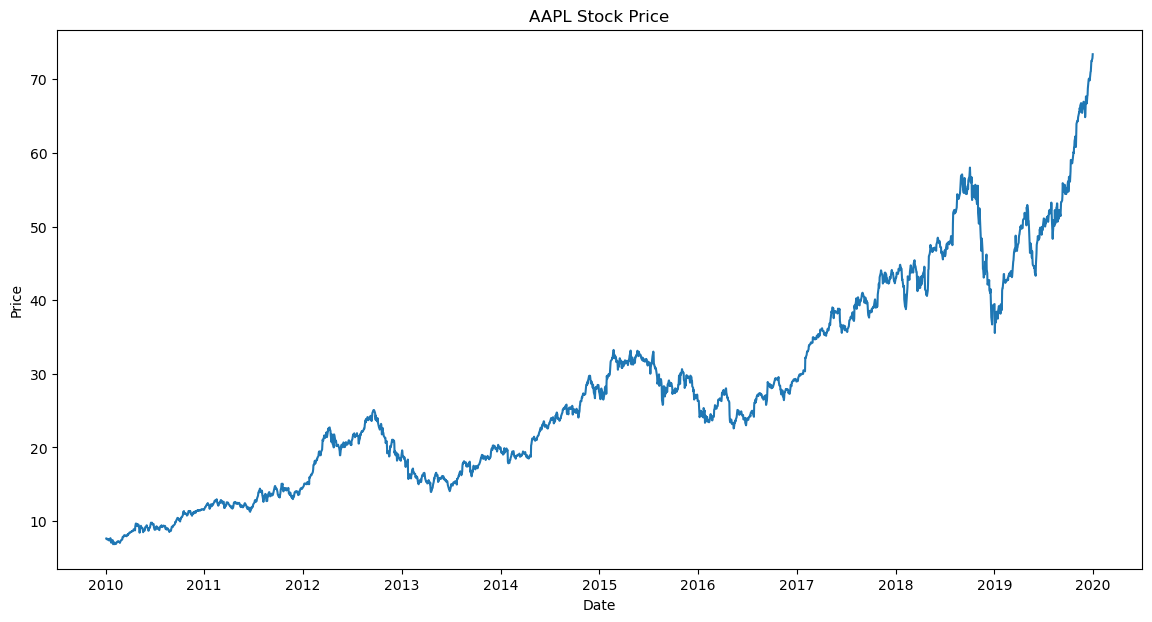

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## 3. Feature Engineering
#### Create new features from the existing data to improve model performance.

In [9]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Returns'] = data['Close'].pct_change()


## 4. Model Development
### Develop and train machine learning models to predict stock prices or returns.

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.5129079447312196


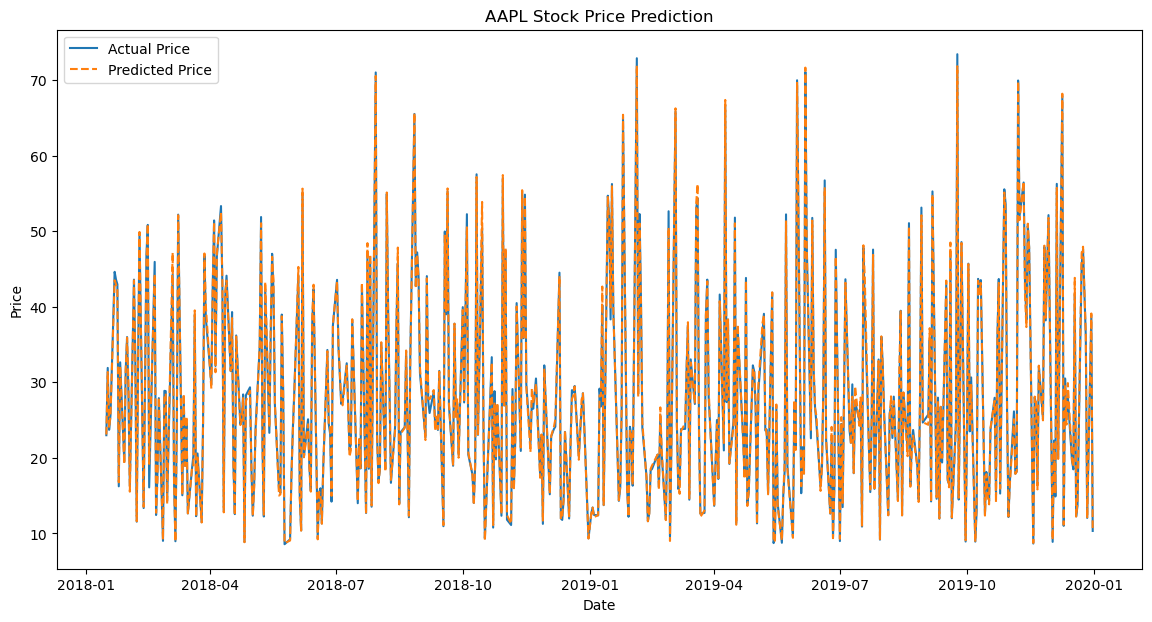

In [12]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
data.to_csv('AAPL.csv')

# Load and preprocess data
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
data.fillna(method='ffill', inplace=True)

# Feature engineering
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Returns'] = data['Close'].pct_change()

# Align features and target
data = data.dropna()  # Drop rows with NaN values created by rolling and pct_change

# Prepare features and target
features = data[['MA10', 'MA50', 'Volatility', 'Returns']]
target = data['Close'].shift(-1).dropna()

# Align features and target by ensuring they have the same length
features = features.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price', linestyle='dashed')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 5. Model Evaluation and Hyperparameter Tuning
### Evaluate the model using appropriate metrics and tune hyperparameters to improve performance.

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.5129079447312196
Best parameters found:  {'max_features': None, 'n_estimators': 200}


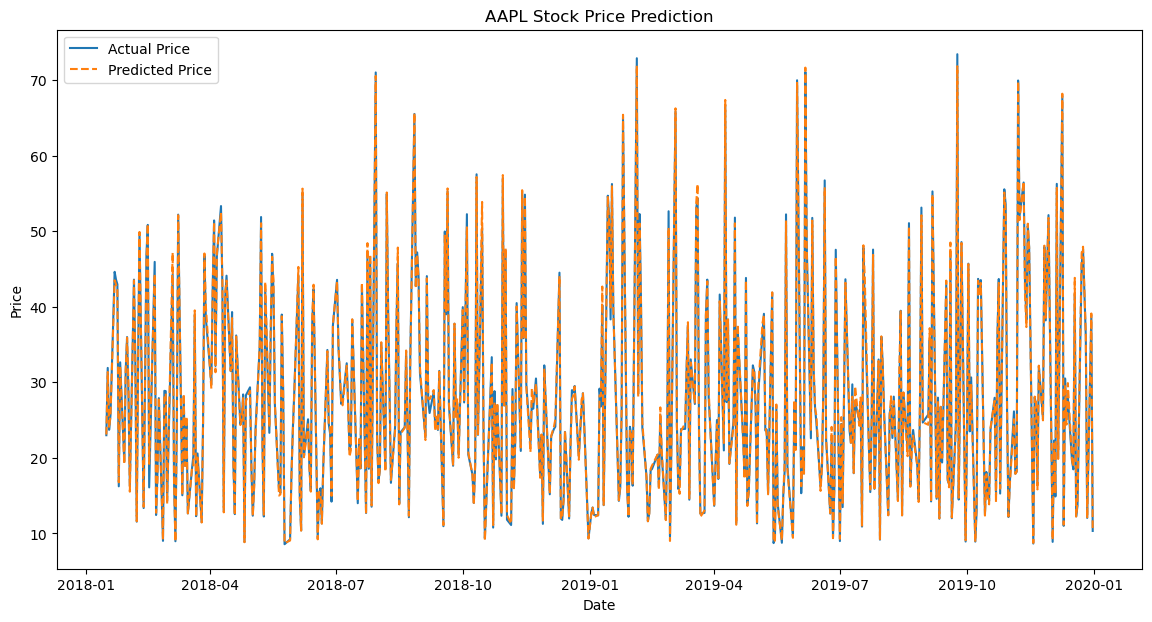

In [17]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
data.to_csv('AAPL.csv')

# Load and preprocess data
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
data.fillna(method='ffill', inplace=True)

# Feature engineering
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Returns'] = data['Close'].pct_change()

# Align features and target
data = data.dropna()  # Drop rows with NaN values created by rolling and pct_change

# Prepare features and target
features = data[['MA10', 'MA50', 'Volatility', 'Returns']]
target = data['Close'].shift(-1).dropna()

# Align features and target by ensuring they have the same length
features = features.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price', linestyle='dashed')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 6. Algorithmic Trading Strategy Development
### Develop a trading strategy based on the model predictions.

[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.5129079447312196
Best parameters found:  {'max_features': None, 'n_estimators': 200}


C:\Users\Nahian\AppData\Local\Temp\ipykernel_11124\3875833283.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Predicted_Close'] > data['Close']] = 1
C:\Users\Nahian\AppData\Local\Temp\ipykernel_11124\3875833283.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][data['Predicted_Close'] <= data['Close']] = -1


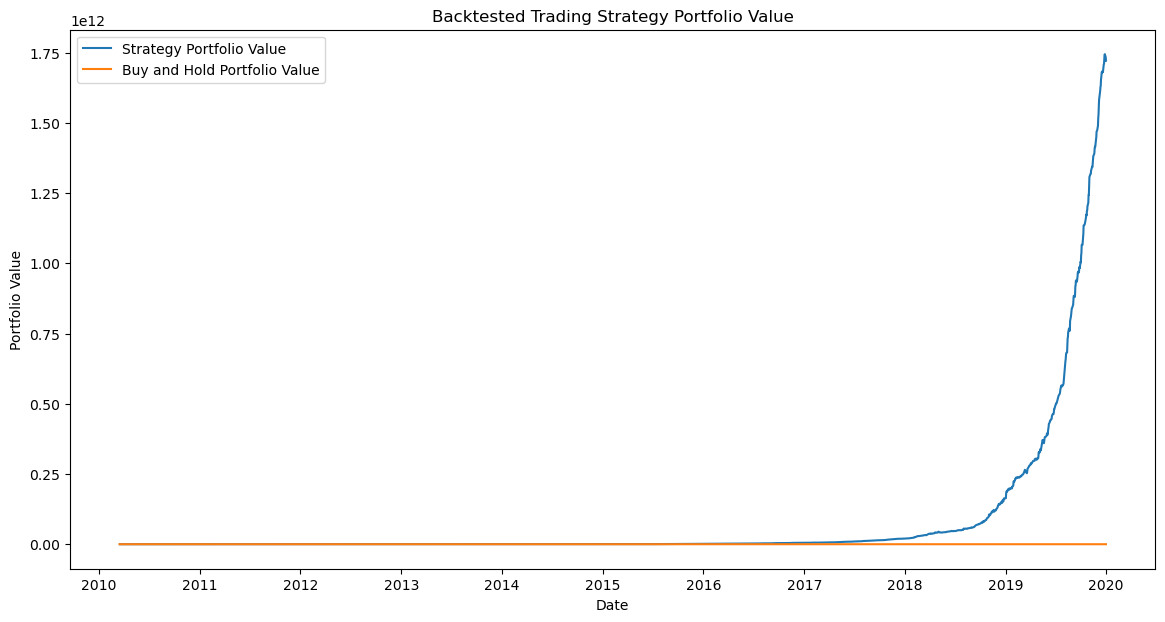

In [19]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
data.to_csv('AAPL.csv')

# Load and preprocess data
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
data.fillna(method='ffill', inplace=True)

# Feature engineering
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Returns'] = data['Close'].pct_change()

# Align features and target
data = data.dropna()  # Drop rows with NaN values created by rolling and pct_change

# Prepare features and target
features = data[['MA10', 'MA50', 'Volatility', 'Returns']]
target = data['Close'].shift(-1).dropna()

# Align features and target by ensuring they have the same length
features = features.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prediction for trading strategy
features_with_target = features.copy()
features_with_target['Target'] = target
features_with_target.dropna(inplace=True)

# Align the prediction DataFrame index with features
data['Predicted_Close'] = pd.Series(best_model.predict(features), index=features.index)

# Define a simple strategy: Buy if the predicted price is higher than today's price, sell otherwise
data['Signal'] = 0
data['Signal'][data['Predicted_Close'] > data['Close']] = 1
data['Signal'][data['Predicted_Close'] <= data['Close']] = -1

# Backtesting the trading strategy
initial_investment = 10000
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
data['Portfolio_Value'] = initial_investment * (1 + data['Strategy_Returns']).cumprod()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Portfolio_Value'], label='Strategy Portfolio Value')
plt.plot(initial_investment * (1 + data['Returns']).cumprod(), label='Buy and Hold Portfolio Value')
plt.legend()
plt.title('Backtested Trading Strategy Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()


[*********************100%%**********************]  1 of 1 completed


Mean Squared Error: 0.5129079447312196
Best parameters found:  {'max_features': None, 'n_estimators': 200}


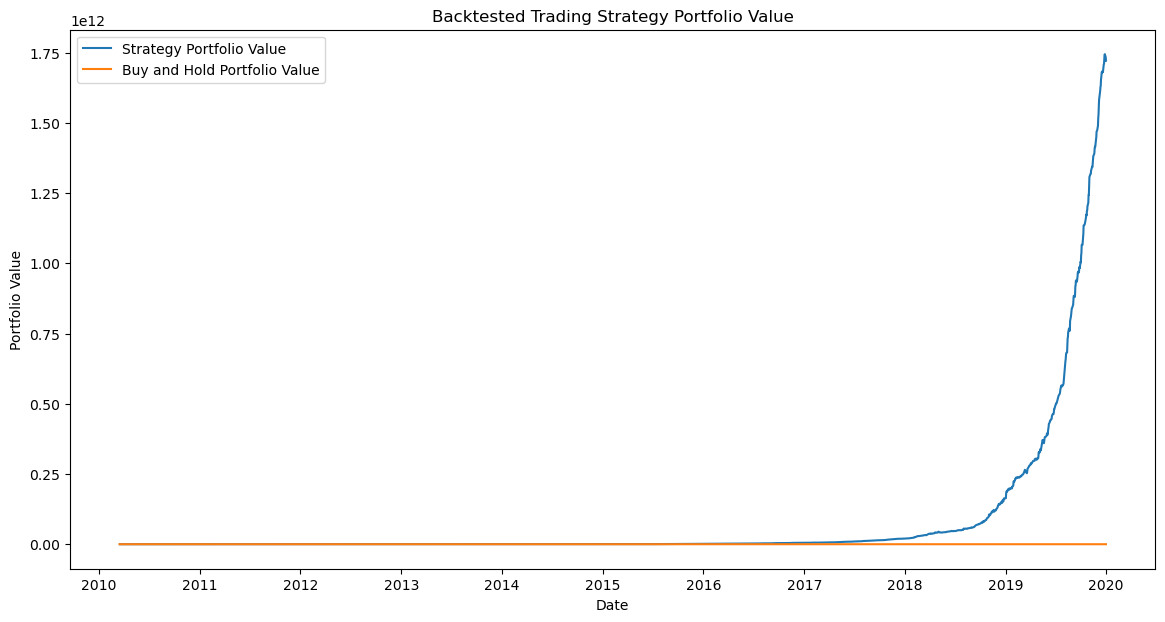

In [21]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
data = yf.download("AAPL", start="2010-01-01", end="2020-01-01")
data.to_csv('AAPL.csv')

# Load and preprocess data
data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)
data.fillna(method='ffill', inplace=True)

# Feature engineering
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()
data['Returns'] = data['Close'].pct_change()

# Align features and target
data = data.dropna()  # Drop rows with NaN values created by rolling and pct_change

# Prepare features and target
features = data[['MA10', 'MA50', 'Volatility', 'Returns']]
target = data['Close'].shift(-1)

# Drop the last row of features to match the length of the target after shift
features = features.iloc[:-1]
target = target.iloc[:-1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Align the prediction DataFrame index with features
data['Predicted_Close'] = pd.Series(best_model.predict(features), index=features.index)

# Explicitly create a copy to avoid SettingWithCopyWarning
data = data.copy()

# Define a simple strategy: Buy if the predicted price is higher than today's price, sell otherwise
data['Signal'] = 0
data.loc[data['Predicted_Close'] > data['Close'], 'Signal'] = 1
data.loc[data['Predicted_Close'] <= data['Close'], 'Signal'] = -1

# Backtesting the trading strategy
initial_investment = 10000
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
data['Portfolio_Value'] = initial_investment * (1 + data['Strategy_Returns']).cumprod()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Portfolio_Value'], label='Strategy Portfolio Value')
plt.plot(initial_investment * (1 + data['Returns']).cumprod(), label='Buy and Hold Portfolio Value')
plt.legend()
plt.title('Backtested Trading Strategy Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()


### 7. Backtesting the trading strategy with more detailed metrics



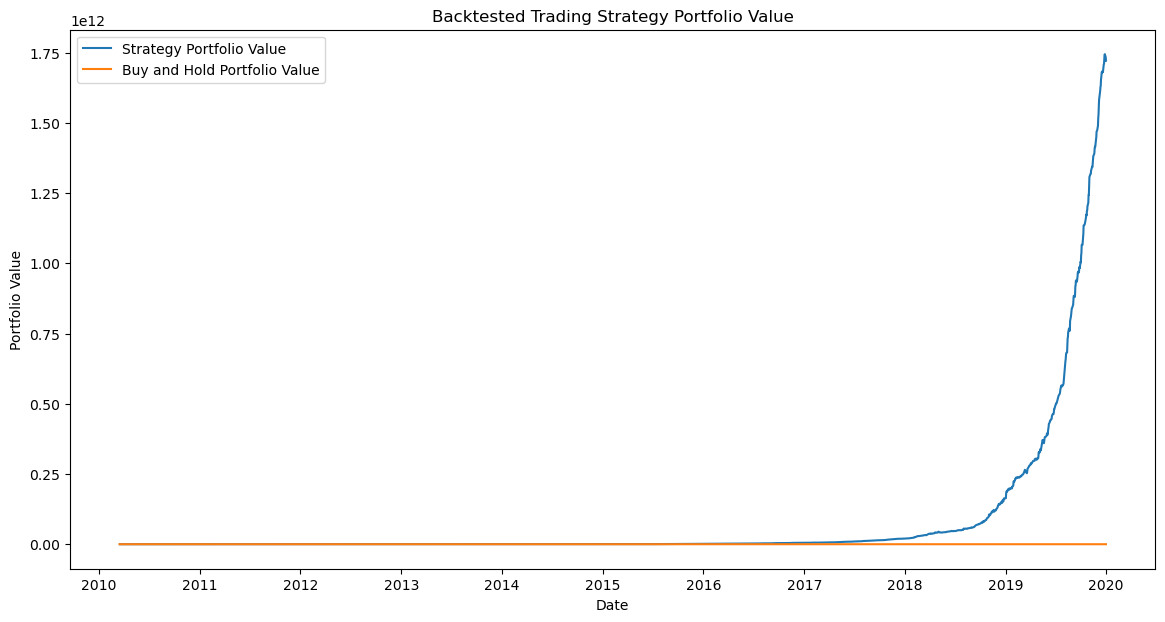

Sharpe Ratio: 8.734253676578184


In [22]:
# Backtesting the trading strategy with more detailed metrics
initial_investment = 10000
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Returns']
data['Portfolio_Value'] = initial_investment * (1 + data['Strategy_Returns']).cumprod()

# Calculate additional performance metrics
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod()
data['Strategy_Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['Portfolio_Value'], label='Strategy Portfolio Value')
plt.plot(initial_investment * data['Cumulative_Returns'], label='Buy and Hold Portfolio Value')
plt.legend()
plt.title('Backtested Trading Strategy Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.show()

# Calculate the Sharpe Ratio
mean_strategy_return = data['Strategy_Returns'].mean()
std_strategy_return = data['Strategy_Returns'].std()
sharpe_ratio = mean_strategy_return / std_strategy_return * (252 ** 0.5)  # Assuming 252 trading days in a year
print(f'Sharpe Ratio: {sharpe_ratio}')


##  8.Evaluation of Strategy Performance
### Evaluate the performance of your strategy using metrics such as Sharpe Ratio, Maximum Drawdown, and others.

In [23]:
# Maximum Drawdown
rolling_max = data['Portfolio_Value'].cummax()
daily_drawdown = data['Portfolio_Value'] / rolling_max - 1.0
max_drawdown = daily_drawdown.cummin().min()
print(f'Maximum Drawdown: {max_drawdown}')

# Other metrics can include annualized return, volatility, etc.
annualized_return = data['Strategy_Cumulative_Returns'].iloc[-1]**(252/len(data)) - 1
annualized_volatility = data['Strategy_Returns'].std() * (252 ** 0.5)
print(f'Annualized Return: {annualized_return}')
print(f'Annualized Volatility: {annualized_volatility}')


Maximum Drawdown: -0.14421898554508727
Annualized Return: 5.938596705999417
Annualized Volatility: 0.22560810200130624


##  9. Integrating the Model into a Real-time System
#### For deploying your model in a real-time trading environment, you can use APIs from brokers such as Alpaca, Interactive Brokers, or others. Here is a simple example using Alpaca API:

In [30]:
pip install alpaca_trade_api

  Obtaining dependency information for alpaca_trade_api from https://files.pythonhosted.org/packages/0b/b2/4557d0a4c837b020bc5c8971e8fde8b976e332d5c225476699e0b5e30b41/alpaca_trade_api-3.2.0-py3-none-any.whl.metadata
  Using cached alpaca_trade_api-3.2.0-py3-none-any.whl.metadata (29 kB)
  Obtaining dependency information for deprecation==2.1.0 from https://files.pythonhosted.org/packages/02/c3/253a89ee03fc9b9682f1541728eb66db7db22148cd94f89ab22528cd1e1b/deprecation-2.1.0-py2.py3-none-any.whl.metadata
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
Using cached alpaca_trade_api-3.2.0-py3-none-any.whl (34 kB)
Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
import alpaca_trade_api as tradeapi

# Print version to ensure it is installed correctly
print(tradeapi.__version__)


3.2.0


In [38]:
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta

# Alpaca API credentials
API_KEY = 'your-key'
API_SECRET = 'your-secret-key'
BASE_URL = 'https://api.alpaca.markets'


api = tradeapi.REST(API_KEY, API_SECRET, BASE_URL, api_version='v2')

# Function to get real-time data using the IEX feed
def get_realtime_data(symbol):
    end = datetime.now()
    start = end - timedelta(minutes=15)  # Expanded to ensure we get some bars
    start_str = start.strftime('%Y-%m-%dT%H:%M:%SZ')
    end_str = end.strftime('%Y-%m-%dT%H:%M:%SZ')
    
    try:
        barset = api.get_bars(symbol, tradeapi.TimeFrame.Minute, start=start_str, end=end_str, feed='iex').df
        print("Retrieved bars DataFrame:")
        print(barset.head())
        
        if 'close' in barset.columns:
            return barset['close'].iloc[-1]
        else:
            raise KeyError("The 'close' column is not present in the bars DataFrame.")
    except Exception as e:
        print(f"Error retrieving bars: {e}")
        return None

# Function to place an order
def place_order(symbol, qty, side, order_type, time_in_force):
    api.submit_order(
        symbol=symbol,
        qty=qty,
        side=side,
        type=order_type,
        time_in_force=time_in_force,
    )

# Example: Getting real-time price and placing a trade
symbol = 'AAPL'
try:
    price = get_realtime_data(symbol)
    if price is not None:
        print(f"Current price of {symbol}: {price}")

        # Place a buy order for 1 share of AAPL
        place_order(symbol, 1, 'buy', 'market', 'gtc')
    else:
        print("Failed to retrieve the real-time price.")
except Exception as e:
    print(f"Error: {e}")


Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.


## 10. Continuous Monitoring and Model Updates
### Set up a system to monitor the performance of your model continuously and update it as new data comes in. This can include retraining the model periodically.

In [40]:
pip install schedule


  Obtaining dependency information for schedule from https://files.pythonhosted.org/packages/20/a7/84c96b61fd13205f2cafbe263cdb2745965974bdf3e0078f121dfeca5f02/schedule-1.2.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [41]:
import schedule
print("Schedule module is installed and working!")


Schedule module is installed and working!


In [42]:
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import schedule
import time

# Alpaca API credentials
API_KEY = 'your-key'
API_SECRET = 'your-secret-key'
BASE_URL = 'https://api.alpaca.markets'

api = tradeapi.REST(API_KEY, API_SECRET, BASE_URL, api_version='v2')

# Function to get real-time data using the IEX feed
def get_realtime_data(symbol):
    end = datetime.now()
    start = end - timedelta(minutes=15)  # Expanded to ensure we get some bars
    start_str = start.strftime('%Y-%m-%dT%H:%M:%SZ')
    end_str = end.strftime('%Y-%m-%dT%H:%M:%SZ')
    
    try:
        barset = api.get_bars(symbol, tradeapi.TimeFrame.Minute, start=start_str, end=end_str, feed='iex').df
        print("Retrieved bars DataFrame:")
        print(barset.head())
        
        if 'close' in barset.columns:
            return barset['close'].iloc[-1]
        else:
            raise KeyError("The 'close' column is not present in the bars DataFrame.")
    except Exception as e:
        print(f"Error retrieving bars: {e}")
        return None

# Function to place an order
def place_order(symbol, qty, side, order_type, time_in_force):
    api.submit_order(
        symbol=symbol,
        qty=qty,
        side=side,
        type=order_type,
        time_in_force=time_in_force,
    )

# Function to check and trade
def check_and_trade():
    symbol = 'AAPL'
    try:
        price = get_realtime_data(symbol)
        if price is not None:
            print(f"Current price of {symbol}: {price}")
            # Place a buy order for 1 share of AAPL
            place_order(symbol, 1, 'buy', 'market', 'gtc')
        else:
            print("Failed to retrieve the real-time price.")
    except Exception as e:
        print(f"Error: {e}")

# Schedule the task to run every minute
schedule.every(1).minutes.do(check_and_trade)

# Keep the script running
while True:
    schedule.run_pending()
    time.sleep(1)


Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.
Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.
Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.
Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.
Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error retrieving bars: "The 'close' column is not present in the bars DataFrame."
Failed to retrieve the real-time price.
Retrieved bars DataFrame:
Empty DataFrame
Columns: []
Index: []
Error 

KeyboardInterrupt: 